In [1]:
import csv
import glob
import os
import pprint
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
import scipy as scp
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler


Using TensorFlow backend.


In [42]:
class Company:
    aprice=[0.0]*24
    acount=[0.0]*24
    acountTrue=[0.0]*24
    fullPrice=[0.0]*24
    periods={} #3->97 24->18

In [43]:
companies = {}
files = glob.glob('./pdfs/out/*.out')
scaler = MinMaxScaler()
for file in files:
    with open(file) as csv_file:
        print(int(os.path.basename(file).split("_")[0])-1997)
        csv_reader = csv.reader(csv_file, delimiter=' ')
        for row in csv_reader:
            if row[1] not in companies:
                companies[row[1]] = Company()
            companies[row[1]].aprice[int(os.path.basename(file).split("_")[0])-1997]=float(row[2])
files = glob.glob('./pdfs/out/*.out2')
for file in files:
    with open(file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=' ')
        for row in csv_reader:
            try:
                companies[row[1]].acount[int(os.path.basename(file).split("_")[0])-1997]=float(row[2])
                companies[row[1]].acountTrue[int(os.path.basename(file).split("_")[0])-1997]=float(row[2])*1000000
                companies[row[1]].fullPrice[int(os.path.basename(file).split("_")[0])-1997]=companies[row[1]].acountTrue[int(os.path.basename(file).split("_")[0])-1997]*companies[row[1]].aprice[int(os.path.basename(file).split("_")[0])-1997]
                
            except:
                pass
            

print(companies["POLMED"].fullPrice)
print(companies["POLMED"].aprice)
print(companies["POLMED"].acount)
print(companies["POLMED"].acountTrue)


8
12
21
14
17
7
10
20
11
6
13
19
5
4
18
16
15
9
[0.0, 0.0, 0.0, 0.0, 610500.0, 502200.0, 6696000.0, 6517800.0, 9262800.0, 6026400.0, 4073400.0, 618163200.0, 1168500.0, 1159200.0, 857700.0, 140200.0, 119939300.0, 911300.0, 2932000.0, 313200.0, 9377600.0, 25500.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.33, 0.18, 2.4, 3.06, 3.32, 2.16, 1.46, 1.92, 0.95, 0.18, 0.09, 0.02, 1.69, 0.13, 0.2, 0.18, 0.16, 0.01, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.85, 2.79, 2.79, 2.13, 2.79, 2.79, 2.79, 321.96, 1.23, 6.44, 9.53, 7.01, 70.97, 7.01, 14.66, 1.74, 58.61, 2.55, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1850000.0, 2790000.0, 2790000.0, 2130000.0, 2790000.0, 2790000.0, 2790000.0, 321960000.0, 1230000.0, 6440000.0, 9530000.0, 7010000.0, 70970000.0, 7010000.0, 14660000.0, 1740000.0, 58610000.0, 2550000.0, 0.0, 0.0]


In [44]:
files = glob.glob('./csvs/*.xlsx')
for file in files:
    base=os.path.basename(file)
    name=os.path.splitext(base)[0]
    if name not in companies.keys():
        continue
    with open(file) as csv_file:
        flag=True
        csv_reader = csv.reader(csv_file, delimiter=';')
        print(name)
        x=3
        y=24
        for row in csv_reader:
            try:
                if flag and "Accounting period" in row[2]:
                    print(row)
                    flag=False
                    for i in range(x,y):
                        try:
                            if i==x and row[i]=="":
                                x=x+1
                            elif row[i]=="":
                                y=y-1
                            
                        except:
                            y=y-1
                            i=i-2
            except:
                pass
            
            try:
                companies[name].periods[row[2]]=[row[3:24]]            
                
            except:
                pass
            #print(row)
        

POLMED
['D_0', 'Okres obrachunkowy', 'Accounting period', '', '', '', '', '', '', '', '', '', '', '01.07-12.07', '01.08-12.08', '01.09-12.09', '01.10-12.10', '01.11-12.11', '01.12-12.12', '01.13-12.13', '01.14-12.14', '01.15-12.15', '01.16-12.16', '01.17-12.17']
I2DEV
['D_0', 'Okres obrachunkowy', 'Accounting period', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '01.12-12.12', '01.13-12.13', '01.14-12.14', '01.15-12.15', '01.16-12.16', '01.17-12.17', '01.18-12.18']
ARCHICOM
['D_0', 'Okres obrachunkowy', 'Accounting period', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '01.12-12.12', '01.13-12.13', '01.14-12.14', '01.15-12.15', '01.16-12.16', '01.17-12.17', '01.18-12.18']
RONSON
['D_0', 'Okres obrachunkowy', 'Accounting period', '', '', '', '', '', '', '', '', '01.05-12.05', '01.06-12.06', '01.07-12.07', '01.08-12.08', '01.09-12.09', '01.10-12.10', '01.11-12.11', '01.12-12.12', '01.13-12.13', '01.14-12.14', '01.15-12.15', '01.16-12.16', '01.17-12.17', '01.1

HUBSTYLE
['D_0', 'Okres obrachunkowy', 'Accounting period', '', '', '', '', '', '', '', '', '', '', '', '', '01.09-12.09', '01.10-12.10', '01.11-12.11', '01.12-12.12', '01.13-12.13', '01.14-12.14', '01.15-12.15', '01.16-12.16', '01.17-12.17', '01.18-12.18']
GOBARTO
['D_0', 'Okres obrachunkowy', 'Accounting period', '', '', '', '', '', '01.02-12.02', '01.03-12.03', '01.04-12.04', '01.05-12.05', '01.06-12.06', '01.07-12.07', '01.08-12.08', '01.09-12.09', '01.10-12.10', '01.11-12.11', '01.12-12.12', '01.13-12.13', '01.14-12.14', '01.15-12.15', '01.16-12.16', '01.17-12.17', '01.18-12.18']
EFEKT
['D_0', 'Okres obrachunkowy', 'Accounting period', '01.97-12.97', '01.98-12.98', '01.99-12.99', '01.00-12.00', '01.01-12.01', '01.02-12.02', '01.03-12.03', '01.04-12.04', '01.05-12.05', '01.06-12.06', '01.07-12.07', '01.08-12.08', '01.09-12.09', '01.10-12.10', '01.11-12.11', '01.12-12.12', '01.13-12.13', '01.14-12.14', '01.15-12.15', '01.16-12.16', '01.17-12.17', '01.18-12.18']
RAFAMET
['D_0', 'Okre

In [45]:
for key in companies["POLMED"].periods.keys():
    print(key)
print("asd")

Accounting period
Basic information
End of period
Start of period
Revenues from sales
Operating profit/loss
Net profit/loss attributable to equity holders of the parent
Total comprehensive income attributable to equity holders
Depreciation
Cash flow from operating activities
Cash flow from investing activities
Cash flow from financing activities
Aktywa
Non-current assets
Current assets
Equity shareholders of the parent
Non-current liabilities
Current liabilities
Number of shares ('000)
Earnings per share
Total comprehensive income per share
Book value per share
Accounting standard
Currency
Note
Balance sheet
ASSETS
Property, plant and equipment
Exploration for and evaluation of mineral resources
Intangible assets
Goodwill
Investment property
Investment in affiliates
Non-current financial assets
Non-current loans and receivables
Deferred income tax
Non-current deferred charges and accruals
Non-current derivative instruments
Other non-current assets
Inventories
Current intangible assets


In [23]:
scp.stats.zscore(companies["POLMED"].fullPrice[4:22])

array([-0.30454067, -0.30530405, -0.26164546, -0.26290155, -0.24355271,
       -0.26636531, -0.28013153,  4.04843807, -0.30060747, -0.30067302,
       -0.30279822, -0.3078557 ,  0.53657901, -0.30242041, -0.28817698,
       -0.30663627, -0.24274352, -0.3086642 ])

In [25]:
class CompanyData:
    name=""
    year=0
    properties=0.0
    nonCurrentLiabilities=0.0
    currentLiabbilities=0.0
    equities=0.0
    fullPrice=0.0
    priceNextYear=0.0
    

In [64]:
data=[["name", "year", "properties", "nonCurrentLiabilities", "currentLiabbilities", "equities", "fullPrice", "priceNextYear"]]
# data=np.append(data,[[0,0,0,0,0,0,0,0]], axis=0)
print(data)
for key in companies:
    for i in range(24):
        print(companies[key].fullPrice[i])
        if companies[key].fullPrice[i]==0.0:
            continue
        ar=[]
        try:
            
            ar=np.append(ar,key)
            ar=np.append(ar,i+1997)
            ar=np.append(ar,companies[key].periods["Property, plant and equipment"][0][i])
            ar=np.append(ar,companies[key].periods["Non-current liabilities"][0][i])
            ar=np.append(ar,companies[key].periods["Current liabilities"][0][i])
            ar=np.append(ar,companies[key].periods["Equity shareholders of the parent"][0][i])
            ar=np.append(ar,companies[key].fullPrice[i])
            ar=np.append(ar,companies[key].fullPrice[i+1])
        except:
            continue
        print(data)
        print(ar)
        data=np.append(data,[ar],axis=0)
        
    
    print(data)
    print(key)
    

[['name', 'year', 'properties', 'nonCurrentLiabilities', 'currentLiabbilities', 'equities', 'fullPrice', 'priceNextYear']]
0.0
0.0
0.0
0.0
610500.0
[['name', 'year', 'properties', 'nonCurrentLiabilities', 'currentLiabbilities', 'equities', 'fullPrice', 'priceNextYear']]
['ALCHEMIA' '2001' '' '' '' '' '610500.0' '502200.0']
502200.0
[['name' 'year' 'properties' 'nonCurrentLiabilities'
  'currentLiabbilities' 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' '' '' '' '610500.0' '502200.0']]
['ALCHEMIA' '2002' '' '' '' '' '502200.0' '6696000.0']
6696000.0
[['name' 'year' 'properties' 'nonCurrentLiabilities'
  'currentLiabbilities' 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' '' '' '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' '' '' '' '502200.0' '6696000.0']]
['ALCHEMIA' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' 'nonCurrentLiabilities'
  'currentLiabbilities' 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '20

[['name' 'year' 'properties' 'nonCurrentLiabilities'
  'currentLiabbilities' 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' '' '' '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' '' '' '' '502200.0' '6696000.0']
 ['ALCHEMIA' '2003' '' '' '' '' '6696000.0' '6517800.0']
 ['ALCHEMIA' '2004' '' '' '' '' '6517800.0' '9262800.0']
 ['ALCHEMIA' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
 ['ALCHEMIA' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
 ['ALCHEMIA' '2007' '16086' '610' '2677' '41013' '4073400.0'
  '618163200.0']
 ['ALCHEMIA' '2008' '24380' '865' '9160' '48498' '618163200.0'
  '1168500.0']
 ['ALCHEMIA' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
 ['ALCHEMIA' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
 ['ALCHEMIA' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
 ['ALCHEMIA' '2012' '41583' '738' '13688' '106601' '140200.0'
  '119939300.0']
 ['ALCHEMIA' '2013' '62308' '673' '14845' '119491' '1

2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SIMPLE' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['SIMPLE' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['SIMPLE' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['SIMPLE' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SIMPLE' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['SIMPLE' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['SIMPLE' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['SIMPLE' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['09KWIAT' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['09KWIAT' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['09KWIAT' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['09KWIAT' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['09KWIAT' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['09KWIAT' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['09KWIAT' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
09KWIAT
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GTC' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['GTC' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['GTC' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['GTC' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GTC' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['GTC' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['GTC' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['GTC' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '

6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BRE' '2003' '' ... '' '6696000.0' '6517800.0']
 ['BRE' '2004' '' ... '' '6517800.0' '9262800.0']
 ['BRE' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['BRE' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BRE' '2004' '' ... '' '6517800.0' '9262800.0']
 ['BRE' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['BRE' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['BRE' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 [

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['IMPEXMET' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['IMPEXMET' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['IMPEXMET' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
['MOL' '2001' '' '' '' '' '610500.0' '502200.0']
502200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['IMPEXMET' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['IMPEXMET' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['MOL' '2001' '' ... '' '610500.0' '502200.0']]
['MOL' '2002' '' '' '' '' '502200.0' '6696000.0']
6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' 

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['08OCTAVA' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['08OCTAVA' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['08OCTAVA' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['08OCTAVA' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['08OCTAVA' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['08OCTAVA' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['08OCTAVA' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
08OCTAVA
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '50

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TPSA' '2004' '' ... '' '6517800.0' '9262800.0']
 ['TPSA' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['TPSA' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['TPSA' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TPSA' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['TPSA' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['TPSA' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['TPSA' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '61

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ZYWIEC' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['ZYWIEC' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['ZYWIEC' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
['HUTMEN' '2001' '' '' '' '' '610500.0' '502200.0']
502200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ZYWIEC' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['ZYWIEC' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['HUTMEN' '2001' '' ... '' '610500.0' '502200.0']]
['HUTMEN' '2002' '' '' '' '' '502200.0' '6696000.0']
6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['MOSTALEXP' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['MOSTALEXP' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['MPECWRO' '2001' '' ... '' '610500.0' '502200.0']]
['MPECWRO' '2002' '' '' '' '' '502200.0' '6696000.0']
6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['MOSTALEXP' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['MPECWRO' '2001' '' ... '' '610500.0' '502200.0']
 ['MPECWRO' '2002' '' ... '' '502200.0' '6696000.0']]
['MPECWRO' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' 

502200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['IMPEL' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['IMPEL' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['MILMET' '2001' '' ... '' '610500.0' '502200.0']]
['MILMET' '2002' '' '' '' '' '502200.0' '6696000.0']
6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['IMPEL' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['MILMET' '2001' '' ... '' '610500.0' '502200.0']
 ['MILMET' '2002' '' ... '' '502200.0' '6696000.0']]
['MILMET' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['EMAX' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['EMAX' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['EMAX' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['EMAX' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['EMAX' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['EMAX' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['EMAX' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['EMAX' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' 

119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['DZPOLSKA' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['DZPOLSKA' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['DZPOLSKA' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['DZPOLSKA' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['DZPOLSKA' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['DZPOLSKA' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['DZPOLSKA' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['DZPOLSKA' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 

6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['LDASA' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['MIESZKO' '2001' '' ... '' '610500.0' '502200.0']
 ['MIESZKO' '2002' '' ... '' '502200.0' '6696000.0']]
['MIESZKO' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['MIESZKO' '2001' '' ... '' '610500.0' '502200.0']
 ['MIESZKO' '2002' '' ... '' '502200.0' '6696000.0']
 ['MIESZKO' '2003' '' ... '' '6696000.0' '6517800.0']]
['MIESZKO' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200

9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['05VICT' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['05VICT' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['05VICT' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['05VICT' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['05VICT' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['05VICT' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['05VICT' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
05VICT
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ELDORADO' '2002' '' ... '' '502200.0' '6696000.0']
 ['ELDORADO' '2003' '' ... '' '6696000.0' '6517800.0']
 ['ELDORADO' '2004' '' ... '' '6517800.0' '9262800.0']]
['ELDORADO' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ELDORADO' '2003' '' ... '' '6696000.0' '6517800.0']
 ['ELDORADO' '2004' '' ... '' '6517800.0' '9262800.0']
 ['ELDORADO' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['ELDORADO' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0

119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['OPTIMUS' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['OPTIMUS' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['OPTIMUS' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['OPTIMUS' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['OPTIMUS' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['OPTIMUS' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['OPTIMUS' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['OPTIMUS' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNe

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['WANDALEX' '2003' '' ... '' '6696000.0' '6517800.0']
 ['WANDALEX' '2004' '' ... '' '6517800.0' '9262800.0']
 ['WANDALEX' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['WANDALEX' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['WANDALEX' '2004' '' ... '' '6517800.0' '9262800.0']
 ['WANDALEX' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['WANDALEX' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['WANDALEX' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ..

140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GROCLIN' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['GROCLIN' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['GROCLIN' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['GROCLIN' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GROCLIN' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['GROCLIN' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['GROCLIN' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['GROCLIN' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYe

1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['KABLE' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['KABLE' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['KABLE' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['KABLE' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['KABLE' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['KABLE' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['KABLE' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['KABLE' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA

502200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['01NFI' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['01NFI' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['IMMOEAST' '2001' '' ... '' '610500.0' '502200.0']]
['IMMOEAST' '2002' '' '' '' '' '502200.0' '6696000.0']
6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['01NFI' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['IMMOEAST' '2001' '' ... '' '610500.0' '502200.0']
 ['IMMOEAST' '2002' '' ... '' '502200.0' '6696000.0']]
['IMMOEAST' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ERG' '2004' '' ... '' '6517800.0' '9262800.0']
 ['ERG' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['ERG' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['ERG' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ERG' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['ERG' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['ERG' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['ERG' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' 

2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TFONE' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['TFONE' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['TFONE' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['TFONE' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TFONE' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['TFONE' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['TFONE' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['TFONE' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCH

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['LCCORP' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['LCCORP' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['LCCORP' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['LCCORP' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['LCCORP' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['LCCORP' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['LCCORP' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['LCCORP' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEM

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['HYPERION' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['HYPERION' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['HYPERION' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['HYPERION' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['HYPERION' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['HYPERION' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['HYPERION' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['HYPERION' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNext

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ASBIS' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['ASBIS' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['ASBIS' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['ASBIS' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ASBIS' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['ASBIS' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['ASBIS' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['ASBIS' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' 

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['DOMDEV' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['DOMDEV' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['DOMDEV' '2008' '24380' ... '48498' '618163200.0' '1168500.0']]
['DOMDEV' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['DOMDEV' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['DOMDEV' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['DOMDEV' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['DOMDEV' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCH

4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['REINHOLD' '2004' '' ... '' '6517800.0' '9262800.0']
 ['REINHOLD' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['REINHOLD' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['REINHOLD' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['REINHOLD' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['REINHOLD' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['REINHOLD' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['REINHOLD' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNe

6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SILVANO' '2001' '' ... '' '610500.0' '502200.0']
 ['SILVANO' '2002' '' ... '' '502200.0' '6696000.0']
 ['SILVANO' '2003' '' ... '' '6696000.0' '6517800.0']]
['SILVANO' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SILVANO' '2002' '' ... '' '502200.0' '6696000.0']
 ['SILVANO' '2003' '' ... '' '6696000.0' '6517800.0']
 ['SILVANO' '2004' '' ... '' '6517800.0' '9262800.0']]
['SILVANO' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ..

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['INVESTCON' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['INVESTCON' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['INVESTCON' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['INVESTCON' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['INVESTCON' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['INVESTCON' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['INVESTCON' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['INVESTCON' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'p

6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ELEKTROTI' '2001' '' ... '' '610500.0' '502200.0']
 ['ELEKTROTI' '2002' '' ... '' '502200.0' '6696000.0']
 ['ELEKTROTI' '2003' '' ... '' '6696000.0' '6517800.0']]
['ELEKTROTI' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ELEKTROTI' '2002' '' ... '' '502200.0' '6696000.0']
 ['ELEKTROTI' '2003' '' ... '' '6696000.0' '6517800.0']
 ['ELEKTROTI' '2004' '' ... '' '6517800.0' '9262800.0']]
['ELEKTROTI' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEM

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ARMATURA' '2003' '' ... '' '6696000.0' '6517800.0']
 ['ARMATURA' '2004' '' ... '' '6517800.0' '9262800.0']
 ['ARMATURA' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['ARMATURA' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ARMATURA' '2004' '' ... '' '6517800.0' '9262800.0']
 ['ARMATURA' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['ARMATURA' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['ARMATURA' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ..

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PEP' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['PEP' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['PEP' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
['FOTA' '2001' '' '' '' '' '610500.0' '502200.0']
502200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PEP' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['PEP' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['FOTA' '2001' '' ... '' '610500.0' '502200.0']]
['FOTA' '2002' '' '' '' '' '502200.0' '6696000.0']
6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '5022

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ENERGOINS' '2002' '' ... '' '502200.0' '6696000.0']
 ['ENERGOINS' '2003' '' ... '' '6696000.0' '6517800.0']
 ['ENERGOINS' '2004' '' ... '' '6517800.0' '9262800.0']]
['ENERGOINS' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ENERGOINS' '2003' '' ... '' '6696000.0' '6517800.0']
 ['ENERGOINS' '2004' '' ... '' '6517800.0' '9262800.0']
 ['ENERGOINS' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['ENERGOINS' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '

857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PAMAPOL' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['PAMAPOL' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['PAMAPOL' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['PAMAPOL' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PAMAPOL' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['PAMAPOL' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['PAMAPOL' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['PAMAPOL' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['UNICREDIT' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['UNICREDIT' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['UNICREDIT' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['UNICREDIT' '2012' '41583' '738' '13688' '106601' '140200.0'
 '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['UNICREDIT' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['UNICREDIT' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['UNICREDIT' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['UNICREDIT' '2013' '62308' '673' '14845' '119491' '119939300.0'
 '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'pr

2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['LENA' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['LENA' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['LENA' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['LENA' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['LENA' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['LENA' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['LENA' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['LENA' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['RAFAMET' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['RAFAMET' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['RAFAMET' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['RAFAMET' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['RAFAMET' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['RAFAMET' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['RAFAMET' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['RAFAMET' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALC

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SOBIESKI' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['SOBIESKI' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['SOBIESKI' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['SOBIESKI' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SOBIESKI' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['SOBIESKI' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['SOBIESKI' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['SOBIESKI' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNext

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['RUCH' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['RUCH' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['RUCH' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['RUCH' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['RUCH' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['RUCH' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['RUCH' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['RUCH' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ..

2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['MAKRUM' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['MAKRUM' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['MAKRUM' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['MAKRUM' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['MAKRUM' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['MAKRUM' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['MAKRUM' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['MAKRUM' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']

4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['WOLAINFO' '2004' '' ... '' '6517800.0' '9262800.0']
 ['WOLAINFO' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['WOLAINFO' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['WOLAINFO' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['WOLAINFO' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['WOLAINFO' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['WOLAINFO' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['WOLAINFO' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNe

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['QUANTUM' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['PGNIG' '2001' '' ... '' '610500.0' '502200.0']
 ['PGNIG' '2002' '' ... '' '502200.0' '6696000.0']]
['PGNIG' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PGNIG' '2001' '' ... '' '610500.0' '502200.0']
 ['PGNIG' '2002' '' ... '' '502200.0' '6696000.0']
 ['PGNIG' '2003' '' ... '' '6696000.0' '6517800.0']]
['PGNIG' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...


6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['CYFRPLSAT' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['TRAKCJA' '2001' '' ... '' '610500.0' '502200.0']
 ['TRAKCJA' '2002' '' ... '' '502200.0' '6696000.0']]
['TRAKCJA' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TRAKCJA' '2001' '' ... '' '610500.0' '502200.0']
 ['TRAKCJA' '2002' '' ... '' '502200.0' '6696000.0']
 ['TRAKCJA' '2003' '' ... '' '6696000.0' '6517800.0']]
['TRAKCJA' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '50

857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SFINKS' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['SFINKS' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['SFINKS' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['SFINKS' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SFINKS' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['SFINKS' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['SFINKS' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['SFINKS' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['AL

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['COGNOR' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['COGNOR' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['COGNOR' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['COGNOR' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['COGNOR' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['COGNOR' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['COGNOR' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['COGNOR' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA

618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['MEWA' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['MEWA' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['MEWA' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['MEWA' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['MEWA' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['MEWA' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['MEWA' '2008' '24380' ... '48498' '618163200.0' '1168500.0']]
['MEWA' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMI

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['NETMEDIA' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['NETMEDIA' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['NETMEDIA' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
NETMEDIA
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['NETMEDIA' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['NETMEDIA' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['NETMEDIA' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
['WOJAS' '2001' '' '' '' '' '610500.0' '502200.0']
502200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' 

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PONAR' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['PONAR' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['PONAR' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['PONAR' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PONAR' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['PONAR' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['PONAR' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['PONAR' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '200

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['OPONEO.PL' '2004' '' ... '' '6517800.0' '9262800.0']
 ['OPONEO.PL' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['OPONEO.PL' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['OPONEO.PL' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['OPONEO.PL' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['OPONEO.PL' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['OPONEO.PL' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['OPONEO.PL' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNext

6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GINOROSSI' '2003' '' ... '' '6696000.0' '6517800.0']
 ['GINOROSSI' '2004' '' ... '' '6517800.0' '9262800.0']
 ['GINOROSSI' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['GINOROSSI' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GINOROSSI' '2004' '' ... '' '6517800.0' '9262800.0']
 ['GINOROSSI' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['GINOROSSI' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['GINOROSSI' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCH

9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BBICAPNFI' '2002' '' ... '' '502200.0' '6696000.0']
 ['BBICAPNFI' '2003' '' ... '' '6696000.0' '6517800.0']
 ['BBICAPNFI' '2004' '' ... '' '6517800.0' '9262800.0']]
['BBICAPNFI' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BBICAPNFI' '2003' '' ... '' '6696000.0' '6517800.0']
 ['BBICAPNFI' '2004' '' ... '' '6517800.0' '9262800.0']
 ['BBICAPNFI' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['BBICAPNFI' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '6

857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['K2INTERNT' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['K2INTERNT' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['K2INTERNT' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['K2INTERNT' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['K2INTERNT' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['K2INTERNT' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['K2INTERNT' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['K2INTERNT' '2012' '41583' '738' '13688' '106601' '140200.0'
 '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPric

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SYGNITY' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['SYGNITY' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['SYGNITY' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['SYGNITY' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SYGNITY' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['SYGNITY' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['SYGNITY' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['SYGNITY' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['AL

140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['POLREST' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['POLREST' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['POLREST' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['POLREST' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['POLREST' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['POLREST' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['POLREST' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['POLREST' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYe

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BALTONA' '2001' '' ... '' '610500.0' '502200.0']
 ['BALTONA' '2002' '' ... '' '502200.0' '6696000.0']
 ['BALTONA' '2003' '' ... '' '6696000.0' '6517800.0']]
['BALTONA' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BALTONA' '2002' '' ... '' '502200.0' '6696000.0']
 ['BALTONA' '2003' '' ... '' '6696000.0' '6517800.0']
 ['BALTONA' '2004' '' ... '' '6517800.0' '9262800.0']]
['BALTONA' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '5022

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['MASTERPHA' '2004' '' ... '' '6517800.0' '9262800.0']
 ['MASTERPHA' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['MASTERPHA' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['MASTERPHA' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['MASTERPHA' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['MASTERPHA' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['MASTERPHA' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['MASTERPHA' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNext

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TSGAMES' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['TSGAMES' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['TSGAMES' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
TSGAMES
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TSGAMES' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['TSGAMES' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['TSGAMES' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
['SUNEX' '2001' '' '' '' '' '610500.0' '502200.0']
502200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... 

502200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['CDPROJEKT' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['CDPROJEKT' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['VISTAL' '2001' '' ... '' '610500.0' '502200.0']]
['VISTAL' '2002' '' '' '' '' '502200.0' '6696000.0']
6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['CDPROJEKT' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['VISTAL' '2001' '' ... '' '610500.0' '502200.0']
 ['VISTAL' '2002' '' ... '' '502200.0' '6696000.0']]
['VISTAL' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '20

6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ORION' '2003' '' ... '' '6696000.0' '6517800.0']
 ['ORION' '2004' '' ... '' '6517800.0' '9262800.0']
 ['ORION' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['ORION' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ORION' '2004' '' ... '' '6517800.0' '9262800.0']
 ['ORION' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['ORION' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['ORION' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0

2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TESGAS' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['TESGAS' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['TESGAS' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['TESGAS' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TESGAS' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['TESGAS' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['TESGAS' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['TESGAS' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['COMPERIA' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['COMPERIA' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['COMPERIA' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['COMPERIA' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['COMPERIA' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['COMPERIA' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['COMPERIA' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['COMPERIA' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear'

6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['WIRTUALNA' '2001' '' ... '' '610500.0' '502200.0']
 ['WIRTUALNA' '2002' '' ... '' '502200.0' '6696000.0']
 ['WIRTUALNA' '2003' '' ... '' '6696000.0' '6517800.0']]
['WIRTUALNA' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['WIRTUALNA' '2002' '' ... '' '502200.0' '6696000.0']
 ['WIRTUALNA' '2003' '' ... '' '6696000.0' '6517800.0']
 ['WIRTUALNA' '2004' '' ... '' '6517800.0' '9262800.0']]
['WIRTUALNA' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEM

6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BERLING' '2003' '' ... '' '6696000.0' '6517800.0']
 ['BERLING' '2004' '' ... '' '6517800.0' '9262800.0']
 ['BERLING' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['BERLING' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BERLING' '2004' '' ... '' '6517800.0' '9262800.0']
 ['BERLING' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['BERLING' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['BERLING' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' 

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GPRE' '2003' '' ... '' '6696000.0' '6517800.0']
 ['GPRE' '2004' '' ... '' '6517800.0' '9262800.0']
 ['GPRE' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['GPRE' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GPRE' '2004' '' ... '' '6517800.0' '9262800.0']
 ['GPRE' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['GPRE' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['GPRE' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['A

857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PLATYNINW' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['PLATYNINW' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['PLATYNINW' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['PLATYNINW' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PLATYNINW' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['PLATYNINW' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['PLATYNINW' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['PLATYNINW' '2012' '41583' '738' '13688' '106601' '140200.0'
 '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPric

6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['CALATRAVA' '2001' '' ... '' '610500.0' '502200.0']
 ['CALATRAVA' '2002' '' ... '' '502200.0' '6696000.0']
 ['CALATRAVA' '2003' '' ... '' '6696000.0' '6517800.0']]
['CALATRAVA' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['CALATRAVA' '2002' '' ... '' '502200.0' '6696000.0']
 ['CALATRAVA' '2003' '' ... '' '6696000.0' '6517800.0']
 ['CALATRAVA' '2004' '' ... '' '6517800.0' '9262800.0']]
['CALATRAVA' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEM

9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['CCENERGY' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['CCENERGY' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['CCENERGY' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['CCENERGY' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['CCENERGY' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['CCENERGY' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['CCENERGY' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
CCENERGY
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['CDRL' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['CDRL' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['CDRL' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['CDRL' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['CDRL' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['CDRL' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['CDRL' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['CDRL' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... 

140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['EVEREST' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['EVEREST' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['EVEREST' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['EVEREST' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['EVEREST' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['EVEREST' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['EVEREST' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['EVEREST' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYe

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['NEUCA' '2002' '' ... '' '502200.0' '6696000.0']
 ['NEUCA' '2003' '' ... '' '6696000.0' '6517800.0']
 ['NEUCA' '2004' '' ... '' '6517800.0' '9262800.0']]
['NEUCA' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['NEUCA' '2003' '' ... '' '6696000.0' '6517800.0']
 ['NEUCA' '2004' '' ... '' '6517800.0' '9262800.0']
 ['NEUCA' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['NEUCA' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['IPOPEMA' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['IPOPEMA' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['IPOPEMA' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['IPOPEMA' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['IPOPEMA' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['IPOPEMA' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['IPOPEMA' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['IPOPEMA' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['A

618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['AIRWAY' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['AIRWAY' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['AIRWAY' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['AIRWAY' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['AIRWAY' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['AIRWAY' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['AIRWAY' '2008' '24380' ... '48498' '618163200.0' '1168500.0']]
['AIRWAY' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextY

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SKARBIEC' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['SKARBIEC' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['SKARBIEC' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['SKARBIEC' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SKARBIEC' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['SKARBIEC' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['SKARBIEC' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['SKARBIEC' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear'

6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BIK' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['CPGROUP' '2001' '' ... '' '610500.0' '502200.0']
 ['CPGROUP' '2002' '' ... '' '502200.0' '6696000.0']]
['CPGROUP' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['CPGROUP' '2001' '' ... '' '610500.0' '502200.0']
 ['CPGROUP' '2002' '' ... '' '502200.0' '6696000.0']
 ['CPGROUP' '2003' '' ... '' '6696000.0' '6517800.0']]
['CPGROUP' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['IMMOBILE' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['IMMOBILE' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['IMMOBILE' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['IMMOBILE' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['IMMOBILE' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['IMMOBILE' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['IMMOBILE' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['IMMOBILE' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ITMTRADE' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['ENEA' '2001' '' ... '' '610500.0' '502200.0']
 ['ENEA' '2002' '' ... '' '502200.0' '6696000.0']]
['ENEA' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ENEA' '2001' '' ... '' '610500.0' '502200.0']
 ['ENEA' '2002' '' ... '' '502200.0' '6696000.0']
 ['ENEA' '2003' '' ... '' '6696000.0' '6517800.0']]
['ENEA' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ENE

1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['KREC' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['KREC' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['KREC' '2008' '24380' ... '48498' '618163200.0' '1168500.0']]
['KREC' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['KREC' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['KREC' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['KREC' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['KREC' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' 

9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PBKM' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['PBKM' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['PBKM' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['PBKM' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PBKM' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['PBKM' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['PBKM' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
PBKM
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' 

1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ORANGEPL' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['ORANGEPL' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['ORANGEPL' '2008' '24380' ... '48498' '618163200.0' '1168500.0']]
['ORANGEPL' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ORANGEPL' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['ORANGEPL' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['ORANGEPL' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['ORANGEPL' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice

9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ARCTIC' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['ARCTIC' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['ARCTIC' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['ARCTIC' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ARCTIC' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['ARCTIC' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['ARCTIC' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
ARCTIC
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0

9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['NOVATURAS' '2002' '' ... '' '502200.0' '6696000.0']
 ['NOVATURAS' '2003' '' ... '' '6696000.0' '6517800.0']
 ['NOVATURAS' '2004' '' ... '' '6517800.0' '9262800.0']]
['NOVATURAS' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['NOVATURAS' '2003' '' ... '' '6696000.0' '6517800.0']
 ['NOVATURAS' '2004' '' ... '' '6517800.0' '9262800.0']
 ['NOVATURAS' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['NOVATURAS' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '6

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PATENTUS' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['PATENTUS' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['PATENTUS' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['PATENTUS' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PATENTUS' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['PATENTUS' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['PATENTUS' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['PATENTUS' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ARCHICOM' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['ARCHICOM' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['ARCHICOM' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['ARCHICOM' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ARCHICOM' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['ARCHICOM' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['ARCHICOM' '2008' '24380' ... '48498' '618163200.0' '1168500.0']]
['ARCHICOM' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceN

911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BOGDANKA' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['BOGDANKA' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['BOGDANKA' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['BOGDANKA' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BOGDANKA' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['BOGDANKA' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['BOGDANKA' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['BOGDANKA' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' '

6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PRAIRIE' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['AGROTON' '2001' '' ... '' '610500.0' '502200.0']
 ['AGROTON' '2002' '' ... '' '502200.0' '6696000.0']]
['AGROTON' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['AGROTON' '2001' '' ... '' '610500.0' '502200.0']
 ['AGROTON' '2002' '' ... '' '502200.0' '6696000.0']
 ['AGROTON' '2003' '' ... '' '6696000.0' '6517800.0']]
['AGROTON' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '5022

1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['INC' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['INC' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['INC' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['INC' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['INC' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['INC' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['INC' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['INC' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... 

2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['KANIA' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['KANIA' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['KANIA' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['KANIA' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['KANIA' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['KANIA' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['KANIA' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['KANIA' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCH

313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TAURONPE' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['TAURONPE' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['TAURONPE' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['TAURONPE' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TAURONPE' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['TAURONPE' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['TAURONPE' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['TAURONPE' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice'

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BGZBNPP' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['BGZBNPP' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['BGZBNPP' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
['SESCOM' '2001' '' '' '' '' '610500.0' '502200.0']
502200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BGZBNPP' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['BGZBNPP' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['SESCOM' '2001' '' ... '' '610500.0' '502200.0']]
['SESCOM' '2002' '' '' '' '' '502200.0' '6696000.0']
6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEM

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['IBSM' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['IBSM' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['IBSM' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
IBSM
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['IBSM' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['IBSM' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['IBSM' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
['ZAMET' '2001' '' '' '' '' '610500.0' '502200.0']
502200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '669600

6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['INDYGO' '2001' '' ... '' '610500.0' '502200.0']
 ['INDYGO' '2002' '' ... '' '502200.0' '6696000.0']
 ['INDYGO' '2003' '' ... '' '6696000.0' '6517800.0']]
['INDYGO' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['INDYGO' '2002' '' ... '' '502200.0' '6696000.0']
 ['INDYGO' '2003' '' ... '' '6696000.0' '6517800.0']
 ['INDYGO' '2004' '' ... '' '6517800.0' '9262800.0']]
['INDYGO' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '50

6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ALIOR' '2003' '' ... '' '6696000.0' '6517800.0']
 ['ALIOR' '2004' '' ... '' '6517800.0' '9262800.0']
 ['ALIOR' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['ALIOR' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ALIOR' '2004' '' ... '' '6517800.0' '9262800.0']
 ['ALIOR' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['ALIOR' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['ALIOR' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0

1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['INVISTA' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['INVISTA' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['INVISTA' '2008' '24380' ... '48498' '618163200.0' '1168500.0']]
['INVISTA' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['INVISTA' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['INVISTA' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['INVISTA' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['INVISTA' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'price

119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['COALENERG' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['COALENERG' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['COALENERG' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['COALENERG' '2013' '62308' '673' '14845' '119491' '119939300.0'
 '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['COALENERG' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['COALENERG' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['COALENERG' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['COALENERG' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fu

119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['POLWAX' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['POLWAX' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['POLWAX' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['POLWAX' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['POLWAX' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['POLWAX' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['POLWAX' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['POLWAX' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']

140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PEMANAGER' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['PEMANAGER' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['PEMANAGER' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['PEMANAGER' '2012' '41583' '738' '13688' '106601' '140200.0'
 '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PEMANAGER' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['PEMANAGER' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['PEMANAGER' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['PEMANAGER' '2013' '62308' '673' '14845' '119491' '119939300.0'
 '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullP

857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['AILLERON' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['AILLERON' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['AILLERON' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['AILLERON' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['AILLERON' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['AILLERON' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['AILLERON' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['AILLERON' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'price

1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['KCI' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['KCI' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['KCI' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['KCI' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['KCI' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['KCI' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['KCI' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['KCI' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... 

1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TORPOL' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['TORPOL' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['TORPOL' '2008' '24380' ... '48498' '618163200.0' '1168500.0']]
['TORPOL' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TORPOL' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['TORPOL' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['TORPOL' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['TORPOL' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear

6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SYNEKTIK' '2001' '' ... '' '610500.0' '502200.0']
 ['SYNEKTIK' '2002' '' ... '' '502200.0' '6696000.0']
 ['SYNEKTIK' '2003' '' ... '' '6696000.0' '6517800.0']]
['SYNEKTIK' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SYNEKTIK' '2002' '' ... '' '502200.0' '6696000.0']
 ['SYNEKTIK' '2003' '' ... '' '6696000.0' '6517800.0']
 ['SYNEKTIK' '2004' '' ... '' '6517800.0' '9262800.0']]
['SYNEKTIK' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '200

6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['OAT' '2003' '' ... '' '6696000.0' '6517800.0']
 ['OAT' '2004' '' ... '' '6517800.0' '9262800.0']
 ['OAT' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['OAT' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['OAT' '2004' '' ... '' '6517800.0' '9262800.0']
 ['OAT' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['OAT' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['OAT' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 [

618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TOWERINVT' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['TOWERINVT' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['TOWERINVT' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['TOWERINVT' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['TOWERINVT' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['TOWERINVT' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['TOWERINVT' '2008' '24380' ... '48498' '618163200.0' '1168500.0']]
['TOWERINVT' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
1159200.0
[['name' 'year' 'properties' ... 'equities'

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PGO' '2003' '' ... '' '6696000.0' '6517800.0']
 ['PGO' '2004' '' ... '' '6517800.0' '9262800.0']
 ['PGO' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['PGO' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PGO' '2004' '' ... '' '6517800.0' '9262800.0']
 ['PGO' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['PGO' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['PGO' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA'

6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PEIXIN' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['QUERCUS' '2001' '' ... '' '610500.0' '502200.0']
 ['QUERCUS' '2002' '' ... '' '502200.0' '6696000.0']]
['QUERCUS' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['QUERCUS' '2001' '' ... '' '610500.0' '502200.0']
 ['QUERCUS' '2002' '' ... '' '502200.0' '6696000.0']
 ['QUERCUS' '2003' '' ... '' '6696000.0' '6517800.0']]
['QUERCUS' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '50220

9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['LARQ' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['LARQ' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['LARQ' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['LARQ' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['LARQ' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['LARQ' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['LARQ' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
LARQ
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' 

313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PRIMETECH' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['PRIMETECH' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['PRIMETECH' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['PRIMETECH' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PRIMETECH' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['PRIMETECH' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['PRIMETECH' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['PRIMETECH' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fu

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GRODNO' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['GRODNO' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['GRODNO' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
GRODNO
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GRODNO' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['GRODNO' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['GRODNO' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
['BRASTER' '2001' '' '' '' '' '610500.0' '502200.0']
502200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '5

2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['VENTUREIN' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['VENTUREIN' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['VENTUREIN' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['VENTUREIN' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['VENTUREIN' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['VENTUREIN' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['VENTUREIN' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['VENTUREIN' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'ful

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SETANTA' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['SETANTA' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['SETANTA' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['SETANTA' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SETANTA' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['SETANTA' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['SETANTA' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['SETANTA' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 

119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['KDMSHIPNG' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['KDMSHIPNG' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['KDMSHIPNG' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['KDMSHIPNG' '2013' '62308' '673' '14845' '119491' '119939300.0'
 '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['KDMSHIPNG' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['KDMSHIPNG' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['KDMSHIPNG' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['KDMSHIPNG' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fu

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BAHOLDING' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['BAHOLDING' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['BAHOLDING' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['BAHOLDING' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BAHOLDING' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['BAHOLDING' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['BAHOLDING' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['BAHOLDING' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'price

1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['HARPER' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['HARPER' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['HARPER' '2008' '24380' ... '48498' '618163200.0' '1168500.0']]
['HARPER' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['HARPER' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['HARPER' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['HARPER' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['HARPER' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear

6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SCOPAK' '2003' '' ... '' '6696000.0' '6517800.0']
 ['SCOPAK' '2004' '' ... '' '6517800.0' '9262800.0']
 ['SCOPAK' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['SCOPAK' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SCOPAK' '2004' '' ... '' '6517800.0' '9262800.0']
 ['SCOPAK' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['SCOPAK' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['SCOPAK' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '

6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['CUBEITG' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['PGODLEW' '2001' '' ... '' '610500.0' '502200.0']
 ['PGODLEW' '2002' '' ... '' '502200.0' '6696000.0']]
['PGODLEW' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PGODLEW' '2001' '' ... '' '610500.0' '502200.0']
 ['PGODLEW' '2002' '' ... '' '502200.0' '6696000.0']
 ['PGODLEW' '2003' '' ... '' '6696000.0' '6517800.0']]
['PGODLEW' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '5022

313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PTI' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['PTI' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['PTI' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['PTI' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PTI' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['PTI' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['PTI' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['PTI' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' ''

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ADVGRUPA' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['ADVGRUPA' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['ADVGRUPA' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['ADVGRUPA' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ADVGRUPA' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['ADVGRUPA' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['ADVGRUPA' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['ADVGRUPA' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYe

1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BNPPL' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['BNPPL' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['BNPPL' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['BNPPL' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BNPPL' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['BNPPL' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['BNPPL' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['BNPPL' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA

6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['EKO' '2001' '' ... '' '610500.0' '502200.0']
 ['EKO' '2002' '' ... '' '502200.0' '6696000.0']
 ['EKO' '2003' '' ... '' '6696000.0' '6517800.0']]
['EKO' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['EKO' '2002' '' ... '' '502200.0' '6696000.0']
 ['EKO' '2003' '' ... '' '6696000.0' '6517800.0']
 ['EKO' '2004' '' ... '' '6517800.0' '9262800.0']]
['EKO' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ..

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PELION' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['PELION' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['PELION' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['PELION' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PELION' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['PELION' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['PELION' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['PELION' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEM

4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PBOANIOLA' '2004' '' ... '' '6517800.0' '9262800.0']
 ['PBOANIOLA' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['PBOANIOLA' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['PBOANIOLA' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PBOANIOLA' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['PBOANIOLA' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['PBOANIOLA' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['PBOANIOLA' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 

2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['MIT' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['MIT' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['MIT' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['MIT' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['MIT' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['MIT' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['MIT' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['MIT' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' 

618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['EUIMPLANT' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['EUIMPLANT' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['EUIMPLANT' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['EUIMPLANT' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['EUIMPLANT' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['EUIMPLANT' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['EUIMPLANT' '2008' '24380' ... '48498' '618163200.0' '1168500.0']]
['EUIMPLANT' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
1159200.0
[['name' 'year' 'properties' ... 'equities'

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['DUON' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['DUON' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['DUON' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['DUON' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['DUON' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['DUON' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['DUON' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['DUON' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' 

140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GREMMEDIA' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['GREMMEDIA' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['GREMMEDIA' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['GREMMEDIA' '2012' '41583' '738' '13688' '106601' '140200.0'
 '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GREMMEDIA' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['GREMMEDIA' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['GREMMEDIA' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['GREMMEDIA' '2013' '62308' '673' '14845' '119491' '119939300.0'
 '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullP

4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ROVESE' '2004' '' ... '' '6517800.0' '9262800.0']
 ['ROVESE' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['ROVESE' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['ROVESE' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ROVESE' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['ROVESE' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['ROVESE' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['ROVESE' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCH

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SKYSTONE' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['SKYSTONE' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['SKYSTONE' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['SKYSTONE' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['SKYSTONE' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['SKYSTONE' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['SKYSTONE' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
SKYSTONE
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '50

1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PPG' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['PPG' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['PPG' '2008' '24380' ... '48498' '618163200.0' '1168500.0']]
['PPG' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PPG' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['PPG' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['PPG' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['PPG' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['OBORNIKI' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['POLFKUTNO' '2001' '' ... '' '610500.0' '502200.0']
 ['POLFKUTNO' '2002' '' ... '' '502200.0' '6696000.0']]
['POLFKUTNO' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['POLFKUTNO' '2001' '' ... '' '610500.0' '502200.0']
 ['POLFKUTNO' '2002' '' ... '' '502200.0' '6696000.0']
 ['POLFKUTNO' '2003' '' ... '' '6696000.0' '6517800.0']]
['POLFKUTNO' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' 

857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ROLIMPEX' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['ROLIMPEX' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['ROLIMPEX' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['ROLIMPEX' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['ROLIMPEX' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['ROLIMPEX' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['ROLIMPEX' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['ROLIMPEX' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'price

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['DBPBC' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['DBPBC' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['EFL' '2001' '' ... '' '610500.0' '502200.0']]
['EFL' '2002' '' '' '' '' '502200.0' '6696000.0']
6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['DBPBC' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['EFL' '2001' '' ... '' '610500.0' '502200.0']
 ['EFL' '2002' '' ... '' '502200.0' '6696000.0']]
['EFL' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0'

119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['POZMEAT' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['POZMEAT' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['POZMEAT' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['POZMEAT' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['POZMEAT' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['POZMEAT' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['POZMEAT' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['POZMEAT' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNe

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['OPOCZNO' '2001' '' ... '' '610500.0' '502200.0']
 ['OPOCZNO' '2002' '' ... '' '502200.0' '6696000.0']
 ['OPOCZNO' '2003' '' ... '' '6696000.0' '6517800.0']]
['OPOCZNO' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['OPOCZNO' '2002' '' ... '' '502200.0' '6696000.0']
 ['OPOCZNO' '2003' '' ... '' '6696000.0' '6517800.0']
 ['OPOCZNO' '2004' '' ... '' '6517800.0' '9262800.0']]
['OPOCZNO' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '5022

911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['INWESTCON' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['INWESTCON' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['INWESTCON' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['INWESTCON' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['INWESTCON' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['INWESTCON' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['INWESTCON' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['INWESTCON' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'full

9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['UNIWHEELS' '2002' '' ... '' '502200.0' '6696000.0']
 ['UNIWHEELS' '2003' '' ... '' '6696000.0' '6517800.0']
 ['UNIWHEELS' '2004' '' ... '' '6517800.0' '9262800.0']]
['UNIWHEELS' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['UNIWHEELS' '2003' '' ... '' '6696000.0' '6517800.0']
 ['UNIWHEELS' '2004' '' ... '' '6517800.0' '9262800.0']
 ['UNIWHEELS' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['UNIWHEELS' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '6

313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BZWBK2' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['BZWBK2' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['BZWBK2' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['BZWBK2' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BZWBK2' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['BZWBK2' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['BZWBK2' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['BZWBK2' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear'

6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['MOSTALSDL' '2003' '' ... '' '6696000.0' '6517800.0']
 ['MOSTALSDL' '2004' '' ... '' '6517800.0' '9262800.0']
 ['MOSTALSDL' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['MOSTALSDL' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['MOSTALSDL' '2004' '' ... '' '6517800.0' '9262800.0']
 ['MOSTALSDL' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['MOSTALSDL' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['MOSTALSDL' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCH

4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PEKPOL' '2004' '' ... '' '6517800.0' '9262800.0']
 ['PEKPOL' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['PEKPOL' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['PEKPOL' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PEKPOL' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['PEKPOL' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['PEKPOL' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['PEKPOL' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCH

1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['DROSED' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['DROSED' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['DROSED' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['DROSED' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['DROSED' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['DROSED' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['DROSED' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['DROSED' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['

4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['15HETMAN' '2004' '' ... '' '6517800.0' '9262800.0']
 ['15HETMAN' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['15HETMAN' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['15HETMAN' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['15HETMAN' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['15HETMAN' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['15HETMAN' '2007' '16086' ... '41013' '4073400.0' '618163200.0']]
['15HETMAN' '2008' '24380' '865' '9160' '48498' '618163200.0' '1168500.0']
1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNe

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GASTELZUR' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['GASTELZUR' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['GASTELZUR' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['GASTELZUR' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GASTELZUR' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['GASTELZUR' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['GASTELZUR' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['GASTELZUR' '2012' '41583' '738' '13688' '106601' '140200.0'
 '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'price

2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['APLITT' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['APLITT' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['APLITT' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['APLITT' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['APLITT' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['APLITT' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['APLITT' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['APLITT' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']

1168500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BCZ' '2006' '12720' ... '37316' '6026400.0' '4073400.0']
 ['BCZ' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['BCZ' '2008' '24380' ... '48498' '618163200.0' '1168500.0']]
['BCZ' '2009' '23851' '1089' '4068' '69283' '1168500.0' '1159200.0']
1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BCZ' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['BCZ' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['BCZ' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['BCZ' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '

25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BIG' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['BIG' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['BIG' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
BIG
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['BIG' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['BIG' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['BIG' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
['KABLEHOLD' '2001' '' '' '' '' '610500.0' '502200.0']
502200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '5022

6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['AMERBANK' '2001' '' ... '' '610500.0' '502200.0']
 ['AMERBANK' '2002' '' ... '' '502200.0' '6696000.0']
 ['AMERBANK' '2003' '' ... '' '6696000.0' '6517800.0']]
['AMERBANK' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['AMERBANK' '2002' '' ... '' '502200.0' '6696000.0']
 ['AMERBANK' '2003' '' ... '' '6696000.0' '6517800.0']
 ['AMERBANK' '2004' '' ... '' '6517800.0' '9262800.0']]
['AMERBANK' '2005' '12126' '520' '1723' '30845' '9262800.0' '6026400.0']
6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '200

6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['LGPETRO' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['KZWM' '2001' '' ... '' '610500.0' '502200.0']
 ['KZWM' '2002' '' ... '' '502200.0' '6696000.0']]
['KZWM' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['KZWM' '2001' '' ... '' '610500.0' '502200.0']
 ['KZWM' '2002' '' ... '' '502200.0' '6696000.0']
 ['KZWM' '2003' '' ... '' '6696000.0' '6517800.0']]
['KZWM' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 .

6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['AGROS' '2003' '' ... '' '6696000.0' '6517800.0']
 ['AGROS' '2004' '' ... '' '6517800.0' '9262800.0']
 ['AGROS' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['AGROS' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['AGROS' '2004' '' ... '' '6517800.0' '9262800.0']
 ['AGROS' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['AGROS' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['AGROS' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0

911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['OCEAN' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['OCEAN' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['OCEAN' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['OCEAN' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['OCEAN' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['OCEAN' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['OCEAN' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['OCEAN' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHE

[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PIASECKI' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['PIASECKI' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['PIASECKI' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['PIASECKI' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PIASECKI' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['PIASECKI' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['PIASECKI' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['PIASECKI' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNext

6696000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['VISCO' '2017' '74142' ... '148860' '9377600.0' '25500.0']
 ['WKSM' '2001' '' ... '' '610500.0' '502200.0']
 ['WKSM' '2002' '' ... '' '502200.0' '6696000.0']]
['WKSM' '2003' '' '' '' '' '6696000.0' '6517800.0']
6517800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['WKSM' '2001' '' ... '' '610500.0' '502200.0']
 ['WKSM' '2002' '' ... '' '502200.0' '6696000.0']
 ['WKSM' '2003' '' ... '' '6696000.0' '6517800.0']]
['WKSM' '2004' '' '' '' '' '6517800.0' '9262800.0']
9262800.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...

6026400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['DELIA' '2003' '' ... '' '6696000.0' '6517800.0']
 ['DELIA' '2004' '' ... '' '6517800.0' '9262800.0']
 ['DELIA' '2005' '12126' ... '30845' '9262800.0' '6026400.0']]
['DELIA' '2006' '12720' '624' '1914' '37316' '6026400.0' '4073400.0']
4073400.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['DELIA' '2004' '' ... '' '6517800.0' '9262800.0']
 ['DELIA' '2005' '12126' ... '30845' '9262800.0' '6026400.0']
 ['DELIA' '2006' '12720' ... '37316' '6026400.0' '4073400.0']]
['DELIA' '2007' '16086' '610' '2677' '41013' '4073400.0' '618163200.0']
618163200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0

9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['FAMOT' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['FAMOT' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['FAMOT' '2016' '74044' ... '143526' '313200.0' '9377600.0']]
['FAMOT' '2017' '74142' '659' '9388' '148860' '9377600.0' '25500.0']
25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['FAMOT' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['FAMOT' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['FAMOT' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
FAMOT
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['AL

2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['EXBUD' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['EXBUD' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['EXBUD' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['EXBUD' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['EXBUD' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['EXBUD' '2014' '68630' ... '119065' '911300.0' '2932000.0']
 ['EXBUD' '2015' '68095' ... '130446' '2932000.0' '313200.0']]
['EXBUD' '2016' '74044' '751' '10353' '143526' '313200.0' '9377600.0']
9377600.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCH

25500.0
0.0
0.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['EBI' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['EBI' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['EBI' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
EBI
0.0
0.0
0.0
0.0
610500.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['EBI' '2015' '68095' ... '130446' '2932000.0' '313200.0']
 ['EBI' '2016' '74044' ... '143526' '313200.0' '9377600.0']
 ['EBI' '2017' '74142' ... '148860' '9377600.0' '25500.0']]
['CLIF' '2001' '' '' '' '' '610500.0' '502200.0']
502200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0'

911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['KPBP-BICK' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['KPBP-BICK' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['KPBP-BICK' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['KPBP-BICK' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['KPBP-BICK' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['KPBP-BICK' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['KPBP-BICK' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['KPBP-BICK' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'full

140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['LUKBUT' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['LUKBUT' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['LUKBUT' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['LUKBUT' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['LUKBUT' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['LUKBUT' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['LUKBUT' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['LUKBUT' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['

1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PSG' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['PSG' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['PSG' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['PSG' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['PSG' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['PSG' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['PSG' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['PSG' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... 

140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GREENECO' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['GREENECO' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['GREENECO' '2011' '35340' ... '94012' '857700.0' '140200.0']]
['GREENECO' '2012' '41583' '738' '13688' '106601' '140200.0' '119939300.0']
119939300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['GREENECO' '2010' '32046' ... '80418' '1159200.0' '857700.0']
 ['GREENECO' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['GREENECO' '2012' '41583' ... '106601' '140200.0' '119939300.0']]
['GREENECO' '2013' '62308' '673' '14845' '119491' '119939300.0' '911300.0']
911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'pri

911300.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['LIBRA' '2011' '35340' ... '94012' '857700.0' '140200.0']
 ['LIBRA' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['LIBRA' '2013' '62308' ... '119491' '119939300.0' '911300.0']]
['LIBRA' '2014' '68630' '687' '10513' '119065' '911300.0' '2932000.0']
2932000.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['LIBRA' '2012' '41583' ... '106601' '140200.0' '119939300.0']
 ['LIBRA' '2013' '62308' ... '119491' '119939300.0' '911300.0']
 ['LIBRA' '2014' '68630' ... '119065' '911300.0' '2932000.0']]
['LIBRA' '2015' '68095' '661' '7154' '130446' '2932000.0' '313200.0']
313200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHE

1159200.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['POLMOSLBN' '2007' '16086' ... '41013' '4073400.0' '618163200.0']
 ['POLMOSLBN' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['POLMOSLBN' '2009' '23851' ... '69283' '1168500.0' '1159200.0']]
['POLMOSLBN' '2010' '32046' '1038' '5461' '80418' '1159200.0' '857700.0']
857700.0
[['name' 'year' 'properties' ... 'equities' 'fullPrice' 'priceNextYear']
 ['ALCHEMIA' '2001' '' ... '' '610500.0' '502200.0']
 ['ALCHEMIA' '2002' '' ... '' '502200.0' '6696000.0']
 ...
 ['POLMOSLBN' '2008' '24380' ... '48498' '618163200.0' '1168500.0']
 ['POLMOSLBN' '2009' '23851' ... '69283' '1168500.0' '1159200.0']
 ['POLMOSLBN' '2010' '32046' ... '80418' '1159200.0' '857700.0']]
['POLMOSLBN' '2011' '35340' '817' '11266' '94012' '857700.0' '140200.0']
140200.0
[['name' 'year' 'properties' ... 'equities' 'fullPri

In [65]:
with open('data.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(data)

In [2]:
newData=pd.read_csv("newData.csv")

In [3]:
print(newData)

            name  year  properties  nonCurrentLiabilities  \
0       ALCHEMIA  2005       12126                    520   
1       ALCHEMIA  2006       12720                    624   
2       ALCHEMIA  2007       16086                    610   
3       ALCHEMIA  2008       24380                    865   
4       ALCHEMIA  2009       23851                   1089   
...          ...   ...         ...                    ...   
10720  POLMOSBIA  2013       62308                    673   
10721  POLMOSBIA  2014       68630                    687   
10722  POLMOSBIA  2015       68095                    661   
10723  POLMOSBIA  2016       74044                    751   
10724  POLMOSBIA  2017       74142                    659   

       currentLiabbilities  equities    fullPrice  priceNextYear  
0                     1723     30845    9262800.0      6026400.0  
1                     1914     37316    6026400.0      4073400.0  
2                     2677     41013    4073400.0    618163200.0  

In [7]:
traindd, testdd = train_test_split(newData, test_size=0.2)

In [8]:
traindd.to_csv('train.csv')
testdd.to_csv('test.csv')


In [96]:

def get_data():
    scaler = MinMaxScaler()
    train=pd.read_csv("train.csv")
    
    
    test=pd.read_csv("test.csv")
    
    train.drop(['name'],axis = 1 , inplace = True)
    train.drop(['year'],axis = 1 , inplace = True)
    test.drop(['name'],axis = 1 , inplace = True)
    test.drop(['year'],axis = 1 , inplace = True)
    
    
    train[["properties","nonCurrentLiabilities","currentLiabbilities","equities","fullPrice","priceNextYear"]]=scaler.fit_transform(train[["properties","nonCurrentLiabilities","currentLiabbilities","equities","fullPrice","priceNextYear"]])
    test[["properties","nonCurrentLiabilities","currentLiabbilities","equities","fullPrice","priceNextYear"]]=scaler.fit_transform(test[["properties","nonCurrentLiabilities","currentLiabbilities","equities","fullPrice","priceNextYear"]])




    
    return train, test

def get_combined_data():
  #reading train data
  train , test = get_data()

  target = train.priceNextYear
  train.drop(['priceNextYear'],axis = 1 , inplace = True)

  combined = train.append(test)
  combined.reset_index(inplace=True)
  combined.drop(['index','asd'], inplace=True, axis=1)
  return combined, target

def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

#Combine train and test data to process them together
combined, target = get_combined_data()

In [95]:
train, test = get_data()
train.describe()


asd   properties  nonCurrentLiabilities  currentLiabbilities  \
count   8580.000000  8580.000000            8580.000000          8580.000000   
mean    5320.287413     0.481247               0.401220             0.466949   
std     3085.060197     0.376485               0.280040             0.321599   
min        1.000000     0.000000               0.000000             0.000000   
25%     2651.750000     0.189064               0.244288             0.178708   
50%     5295.500000     0.374323               0.293497             0.566758   
75%     7966.250000     0.902493               0.521968             0.669867   
max    10723.000000     1.000000               1.000000             1.000000   

          equities    fullPrice  priceNextYear  
count  8580.000000  8580.000000    8580.000000  
mean      0.500546     0.096307       0.095928  
std       0.340086     0.266277       0.267316  
min       0.000000     0.000000       0.000000  
25%       0.149583     0.001248       0.001346  
50%       0.535246     0.004517       0.001849  
75%       0.751142     0.014761       0.009708  
max       1.000000     1.000000       1.000000

In [97]:
combined.describe()

currentLiabbilities      equities     fullPrice  nonCurrentLiabilities  \
count         10725.000000  10725.000000  10725.000000           10725.000000   
mean              0.467864      0.500842      0.096151               0.401785   
std               0.322056      0.339685      0.265747               0.280097   
min               0.000000      0.000000      0.000000               0.000000   
25%               0.178708      0.149583      0.001248               0.244288   
50%               0.566758      0.535246      0.004517               0.293497   
75%               0.669867      0.751142      0.014761               0.521968   
max               1.000000      1.000000      1.000000               1.000000   

       priceNextYear    properties  
count    2145.000000  10725.000000  
mean        0.092133      0.480909  
std         0.261115      0.375983  
min         0.000000      0.000000  
25%         0.001346      0.189064  
50%         0.001849      0.374323  
75%         0.009708      0.902493  
max         1.000000      1.000000

In [98]:
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [99]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 5
Number of nun-numerical columns with no nan values : 0


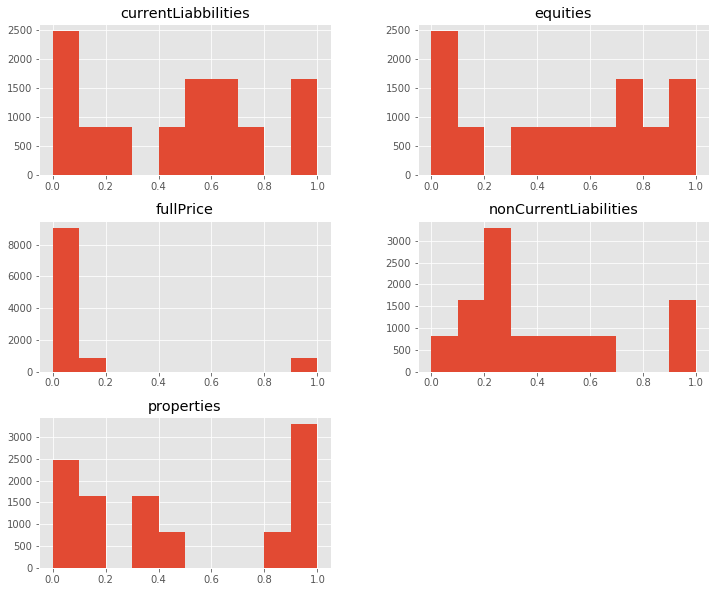

In [100]:
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

In [101]:
train_data, test_data = get_data()


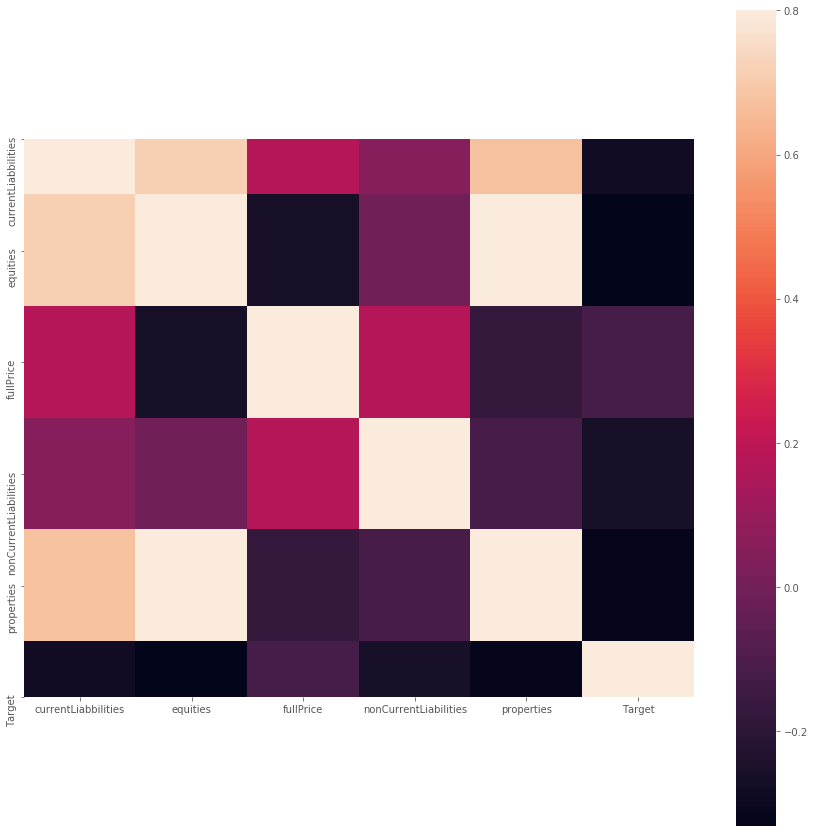

In [102]:
train_data = train_data[num_cols + cat_cols]
train_data['Target'] = target

C_mat = train_data.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [103]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

In [104]:
print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 5 columns before encoding categorical features
There are 5 columns after encoding categorical features


In [105]:
train, test = get_data()

In [106]:
NN_model = Sequential()

In [107]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

In [108]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

In [109]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [110]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________


In [111]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [112]:
H=NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 6864 samples, validate on 1716 samples
Epoch 1/500
6864/6864 [==============================] - 2s 332us/step - loss: 1.7913 - mean_absolute_error: 1.7913 - acc: 0.0485 - val_loss: 0.1416 - val_mean_absolute_error: 0.1416 - val_acc: 0.0705

Epoch 00001: val_loss improved from inf to 0.14159, saving model to Weights-001--0.14159.hdf5
Epoch 2/500
6864/6864 [==============================] - 1s 168us/step - loss: 0.1834 - mean_absolute_error: 0.1834 - acc: 0.0779 - val_loss: 0.1844 - val_mean_absolute_error: 0.1844 - val_acc: 0.0705

Epoch 00002: val_loss did not improve from 0.14159
Epoch 3/500
6864/6864 [==============================] - 1s 169us/step - loss: 0.1921 - mean_absolute_error: 0.1921 - acc: 0.0778 - val_loss: 0.1029 - val_mean_absolute_error: 0.1029 - val_acc: 0.0705

Epoch 00003: val_loss improved from 0.14159 to 0.10288, saving model to Weights-003--0.10288.hdf5
Epoch 4/500
6864/6864 [==============================] - 1s 165us/step - loss: 0.1170 - mean_absolute_e

6864/6864 [==============================] - 1s 164us/step - loss: 0.0957 - mean_absolute_error: 0.0957 - acc: 0.0790 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00032: val_loss did not improve from 0.09216
Epoch 33/500
6864/6864 [==============================] - 1s 152us/step - loss: 0.0956 - mean_absolute_error: 0.0956 - acc: 0.0790 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00033: val_loss did not improve from 0.09216
Epoch 34/500
6864/6864 [==============================] - 1s 165us/step - loss: 0.0957 - mean_absolute_error: 0.0957 - acc: 0.0788 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923 - val_acc: 0.0705

Epoch 00034: val_loss did not improve from 0.09216
Epoch 35/500
6864/6864 [==============================] - 1s 162us/step - loss: 0.0957 - mean_absolute_error: 0.0957 - acc: 0.0790 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00035: val_loss did not improve from 0.092

6864/6864 [==============================] - 1s 171us/step - loss: 0.0957 - mean_absolute_error: 0.0957 - acc: 0.0790 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00064: val_loss did not improve from 0.09216
Epoch 65/500
6864/6864 [==============================] - 1s 164us/step - loss: 0.0957 - mean_absolute_error: 0.0957 - acc: 0.0788 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00065: val_loss did not improve from 0.09216
Epoch 66/500
6864/6864 [==============================] - 1s 164us/step - loss: 0.0957 - mean_absolute_error: 0.0957 - acc: 0.0790 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00066: val_loss did not improve from 0.09216
Epoch 67/500
6864/6864 [==============================] - 1s 164us/step - loss: 0.0956 - mean_absolute_error: 0.0956 - acc: 0.0790 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00067: val_loss did not improve from 0.092

6864/6864 [==============================] - 1s 166us/step - loss: 0.0962 - mean_absolute_error: 0.0962 - acc: 0.0790 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00096: val_loss did not improve from 0.09216
Epoch 97/500
6864/6864 [==============================] - 1s 175us/step - loss: 0.0977 - mean_absolute_error: 0.0977 - acc: 0.0788 - val_loss: 0.0926 - val_mean_absolute_error: 0.0926 - val_acc: 0.0705

Epoch 00097: val_loss did not improve from 0.09216
Epoch 98/500
6864/6864 [==============================] - 1s 167us/step - loss: 0.0957 - mean_absolute_error: 0.0957 - acc: 0.0788 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00098: val_loss did not improve from 0.09216
Epoch 99/500
6864/6864 [==============================] - 1s 175us/step - loss: 0.0956 - mean_absolute_error: 0.0956 - acc: 0.0790 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923 - val_acc: 0.0705

Epoch 00099: val_loss did not improve from 0.092

6864/6864 [==============================] - 1s 153us/step - loss: 0.0954 - mean_absolute_error: 0.0954 - acc: 0.0791 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00128: val_loss did not improve from 0.09177
Epoch 129/500
6864/6864 [==============================] - 1s 165us/step - loss: 0.0955 - mean_absolute_error: 0.0955 - acc: 0.0790 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00129: val_loss did not improve from 0.09177
Epoch 130/500
6864/6864 [==============================] - 1s 154us/step - loss: 0.0954 - mean_absolute_error: 0.0954 - acc: 0.0793 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00130: val_loss did not improve from 0.09177
Epoch 131/500
6864/6864 [==============================] - 1s 154us/step - loss: 0.0952 - mean_absolute_error: 0.0952 - acc: 0.0794 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00131: val_loss did not improve from 0.

6864/6864 [==============================] - 1s 158us/step - loss: 0.0954 - mean_absolute_error: 0.0954 - acc: 0.0793 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923 - val_acc: 0.0705

Epoch 00160: val_loss did not improve from 0.09173
Epoch 161/500
6864/6864 [==============================] - 1s 156us/step - loss: 0.0959 - mean_absolute_error: 0.0959 - acc: 0.0794 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00161: val_loss did not improve from 0.09173
Epoch 162/500
6864/6864 [==============================] - 1s 153us/step - loss: 0.0952 - mean_absolute_error: 0.0952 - acc: 0.0795 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00162: val_loss did not improve from 0.09173
Epoch 163/500
6864/6864 [==============================] - 1s 156us/step - loss: 0.0953 - mean_absolute_error: 0.0953 - acc: 0.0793 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923 - val_acc: 0.0705

Epoch 00163: val_loss did not improve from 0.


Epoch 00191: val_loss did not improve from 0.09085
Epoch 192/500
6864/6864 [==============================] - 1s 176us/step - loss: 0.0946 - mean_absolute_error: 0.0946 - acc: 0.0800 - val_loss: 0.0917 - val_mean_absolute_error: 0.0917 - val_acc: 0.0711

Epoch 00192: val_loss did not improve from 0.09085
Epoch 193/500
6864/6864 [==============================] - 1s 176us/step - loss: 0.0961 - mean_absolute_error: 0.0961 - acc: 0.0800 - val_loss: 0.0914 - val_mean_absolute_error: 0.0914 - val_acc: 0.0711

Epoch 00193: val_loss did not improve from 0.09085
Epoch 194/500
6864/6864 [==============================] - 1s 165us/step - loss: 0.0946 - mean_absolute_error: 0.0946 - acc: 0.0800 - val_loss: 0.0909 - val_mean_absolute_error: 0.0909 - val_acc: 0.0717

Epoch 00194: val_loss did not improve from 0.09085
Epoch 195/500
6864/6864 [==============================] - 1s 166us/step - loss: 0.0945 - mean_absolute_error: 0.0945 - acc: 0.0800 - val_loss: 0.0909 - val_mean_absolute_error: 0.090


Epoch 00223: val_loss did not improve from 0.09036
Epoch 224/500
6864/6864 [==============================] - 1s 159us/step - loss: 0.0967 - mean_absolute_error: 0.0967 - acc: 0.0793 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923 - val_acc: 0.0705

Epoch 00224: val_loss did not improve from 0.09036
Epoch 225/500
6864/6864 [==============================] - 1s 179us/step - loss: 0.0953 - mean_absolute_error: 0.0953 - acc: 0.0794 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00225: val_loss did not improve from 0.09036
Epoch 226/500
6864/6864 [==============================] - 1s 174us/step - loss: 0.0949 - mean_absolute_error: 0.0949 - acc: 0.0797 - val_loss: 0.0921 - val_mean_absolute_error: 0.0921 - val_acc: 0.0705

Epoch 00226: val_loss did not improve from 0.09036
Epoch 227/500
6864/6864 [==============================] - 1s 166us/step - loss: 0.0990 - mean_absolute_error: 0.0990 - acc: 0.0797 - val_loss: 0.0922 - val_mean_absolute_error: 0.092

6864/6864 [==============================] - 1s 161us/step - loss: 0.0948 - mean_absolute_error: 0.0948 - acc: 0.0800 - val_loss: 0.0918 - val_mean_absolute_error: 0.0918 - val_acc: 0.0705

Epoch 00256: val_loss did not improve from 0.09036
Epoch 257/500
6864/6864 [==============================] - 1s 155us/step - loss: 0.0949 - mean_absolute_error: 0.0949 - acc: 0.0801 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00257: val_loss did not improve from 0.09036
Epoch 258/500
6864/6864 [==============================] - 1s 157us/step - loss: 0.0948 - mean_absolute_error: 0.0948 - acc: 0.0800 - val_loss: 0.0913 - val_mean_absolute_error: 0.0913 - val_acc: 0.0711

Epoch 00258: val_loss did not improve from 0.09036
Epoch 259/500
6864/6864 [==============================] - 1s 159us/step - loss: 0.0948 - mean_absolute_error: 0.0948 - acc: 0.0800 - val_loss: 0.0914 - val_mean_absolute_error: 0.0914 - val_acc: 0.0711

Epoch 00259: val_loss did not improve from 0.

6864/6864 [==============================] - 2s 349us/step - loss: 0.0952 - mean_absolute_error: 0.0952 - acc: 0.0794 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00288: val_loss did not improve from 0.08881
Epoch 289/500
6864/6864 [==============================] - 1s 170us/step - loss: 0.0950 - mean_absolute_error: 0.0950 - acc: 0.0798 - val_loss: 0.0919 - val_mean_absolute_error: 0.0919 - val_acc: 0.0711

Epoch 00289: val_loss did not improve from 0.08881
Epoch 290/500
6864/6864 [==============================] - 1s 177us/step - loss: 0.0949 - mean_absolute_error: 0.0949 - acc: 0.0797 - val_loss: 0.0917 - val_mean_absolute_error: 0.0917 - val_acc: 0.0705

Epoch 00290: val_loss did not improve from 0.08881
Epoch 291/500
6864/6864 [==============================] - 1s 168us/step - loss: 0.0952 - mean_absolute_error: 0.0952 - acc: 0.0797 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923 - val_acc: 0.0705

Epoch 00291: val_loss did not improve from 0.

6864/6864 [==============================] - 1s 154us/step - loss: 0.0953 - mean_absolute_error: 0.0953 - acc: 0.0793 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923 - val_acc: 0.0705

Epoch 00320: val_loss did not improve from 0.08881
Epoch 321/500
6864/6864 [==============================] - 1s 152us/step - loss: 0.0951 - mean_absolute_error: 0.0951 - acc: 0.0794 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923 - val_acc: 0.0705

Epoch 00321: val_loss did not improve from 0.08881
Epoch 322/500
6864/6864 [==============================] - 1s 154us/step - loss: 0.0961 - mean_absolute_error: 0.0961 - acc: 0.0797 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923 - val_acc: 0.0705

Epoch 00322: val_loss did not improve from 0.08881
Epoch 323/500
6864/6864 [==============================] - 1s 158us/step - loss: 0.0953 - mean_absolute_error: 0.0953 - acc: 0.0794 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923 - val_acc: 0.0705

Epoch 00323: val_loss did not improve from 0.

6864/6864 [==============================] - 1s 195us/step - loss: 0.0953 - mean_absolute_error: 0.0953 - acc: 0.0793 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00352: val_loss did not improve from 0.08881
Epoch 353/500
6864/6864 [==============================] - 1s 167us/step - loss: 0.1001 - mean_absolute_error: 0.1001 - acc: 0.0791 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00353: val_loss did not improve from 0.08881
Epoch 354/500
6864/6864 [==============================] - 1s 177us/step - loss: 0.0952 - mean_absolute_error: 0.0952 - acc: 0.0794 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00354: val_loss did not improve from 0.08881
Epoch 355/500
6864/6864 [==============================] - 1s 192us/step - loss: 0.0954 - mean_absolute_error: 0.0954 - acc: 0.0791 - val_loss: 0.0923 - val_mean_absolute_error: 0.0923 - val_acc: 0.0705

Epoch 00355: val_loss did not improve from 0.

6864/6864 [==============================] - 1s 167us/step - loss: 0.0971 - mean_absolute_error: 0.0971 - acc: 0.0794 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00384: val_loss did not improve from 0.08881
Epoch 385/500
6864/6864 [==============================] - 1s 174us/step - loss: 0.0952 - mean_absolute_error: 0.0952 - acc: 0.0794 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00385: val_loss did not improve from 0.08881
Epoch 386/500
6864/6864 [==============================] - 1s 166us/step - loss: 0.0952 - mean_absolute_error: 0.0952 - acc: 0.0794 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00386: val_loss did not improve from 0.08881
Epoch 387/500
6864/6864 [==============================] - 1s 205us/step - loss: 0.0952 - mean_absolute_error: 0.0952 - acc: 0.0795 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00387: val_loss did not improve from 0.

6864/6864 [==============================] - 1s 172us/step - loss: 0.0949 - mean_absolute_error: 0.0949 - acc: 0.0798 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00416: val_loss did not improve from 0.08881
Epoch 417/500
6864/6864 [==============================] - 1s 175us/step - loss: 0.0948 - mean_absolute_error: 0.0948 - acc: 0.0798 - val_loss: 0.0921 - val_mean_absolute_error: 0.0921 - val_acc: 0.0705

Epoch 00417: val_loss did not improve from 0.08881
Epoch 418/500
6864/6864 [==============================] - 1s 164us/step - loss: 0.0952 - mean_absolute_error: 0.0952 - acc: 0.0798 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00418: val_loss did not improve from 0.08881
Epoch 419/500
6864/6864 [==============================] - 1s 166us/step - loss: 0.0950 - mean_absolute_error: 0.0950 - acc: 0.0797 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0705

Epoch 00419: val_loss did not improve from 0.

6864/6864 [==============================] - 1s 181us/step - loss: 0.0946 - mean_absolute_error: 0.0946 - acc: 0.0798 - val_loss: 0.0899 - val_mean_absolute_error: 0.0899 - val_acc: 0.0728

Epoch 00448: val_loss did not improve from 0.08881
Epoch 449/500
6864/6864 [==============================] - 1s 169us/step - loss: 0.0946 - mean_absolute_error: 0.0946 - acc: 0.0801 - val_loss: 0.0916 - val_mean_absolute_error: 0.0916 - val_acc: 0.0711

Epoch 00449: val_loss did not improve from 0.08881
Epoch 450/500
6864/6864 [==============================] - 1s 170us/step - loss: 0.0947 - mean_absolute_error: 0.0947 - acc: 0.0801 - val_loss: 0.0911 - val_mean_absolute_error: 0.0911 - val_acc: 0.0717

Epoch 00450: val_loss did not improve from 0.08881
Epoch 451/500
6864/6864 [==============================] - 1s 172us/step - loss: 0.0945 - mean_absolute_error: 0.0945 - acc: 0.0801 - val_loss: 0.0910 - val_mean_absolute_error: 0.0910 - val_acc: 0.0723

Epoch 00451: val_loss did not improve from 0.

6864/6864 [==============================] - 1s 172us/step - loss: 0.0950 - mean_absolute_error: 0.0950 - acc: 0.0797 - val_loss: 0.0918 - val_mean_absolute_error: 0.0918 - val_acc: 0.0711

Epoch 00480: val_loss did not improve from 0.08881
Epoch 481/500
6864/6864 [==============================] - 1s 170us/step - loss: 0.0947 - mean_absolute_error: 0.0947 - acc: 0.0800 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_acc: 0.0711

Epoch 00481: val_loss did not improve from 0.08881
Epoch 482/500
6864/6864 [==============================] - 1s 167us/step - loss: 0.0947 - mean_absolute_error: 0.0947 - acc: 0.0800 - val_loss: 0.0913 - val_mean_absolute_error: 0.0913 - val_acc: 0.0711

Epoch 00482: val_loss did not improve from 0.08881
Epoch 483/500
6864/6864 [==============================] - 1s 169us/step - loss: 0.0945 - mean_absolute_error: 0.0945 - acc: 0.0801 - val_loss: 0.0917 - val_mean_absolute_error: 0.0917 - val_acc: 0.0711

Epoch 00483: val_loss did not improve from 0.

In [65]:
# Load wights file of the best model :
wights_file = 'Weights-476--4136.55751.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it


In [36]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Id':pd.read_csv('test.csv').asd,'SalePrice':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

In [114]:
predictions = NN_model.predict(test)

In [38]:
make_submission(predictions[:,0],'submission(NN).csv')

A submission file has been made


In [116]:
print("[INFO] evaluating network...")
predictions = NN_model.predict(test, batch_size=32)

[INFO] evaluating network...


In [43]:
from sklearn.metrics import classification_report

In [117]:
N = np.arange(0, 500)

In [119]:
print(H.history)

{'val_loss': [0.14159105499307592, 0.1844480809145596, 0.10287872422269452, 0.10734086030429893, 0.12125500126596375, 0.09223220697093955, 0.09217664052348037, 0.093270209407334, 0.09234607549675139, 0.09221565693894744, 0.09226205265952712, 0.0921687844159442, 0.09218776573390115, 0.09219789062138203, 0.0922385328959474, 0.09216882380502762, 0.0922066761063529, 0.09234485669291659, 0.09218377218796657, 0.0922737123839783, 2.0403538961788437, 0.09216346735859807, 0.09223815857808351, 0.09227318360116377, 0.09222447787061994, 0.0923186890902497, 0.0922324528053646, 0.09219666256076528, 0.09223764962874927, 0.09220705153572531, 0.09219774140136225, 0.09223521830804976, 0.09216454748437677, 0.0923225395294614, 0.09221154128338073, 0.09228883569057171, 0.09229255519755236, 0.09217615613153765, 0.09228536309479, 0.09230252388335053, 0.09216912679530524, 0.0921971389116385, 0.09228287175263003, 0.09229042943749395, 0.0922404626831586, 0.09224408977862561, 0.09226234972754836, 0.0923080613319

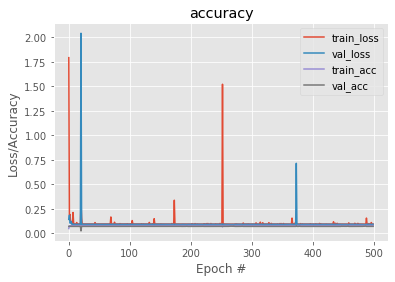

In [118]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
# plt.savefig(args["plot"])

In [120]:
train_X, val_X, train_y, val_y = train_test_split(train, target, test_size = 0.25, random_state = 14)


In [121]:
model = RandomForestRegressor()
model.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [122]:
predicted_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  0.000106953139626915


In [123]:
predicted_prices = model.predict(test)

In [125]:
print(predicted_prices)

[0.00161172 0.00161172 0.00021619 ... 0.00470203 0.01512948 0.01512948]


In [126]:
XGBModel = XGBRegressor()
XGBModel.fit(train_X,train_y , verbose=False)

[17:14:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [127]:
XGBpredictions = XGBModel.predict(val_X)
MAE = mean_absolute_error(val_y , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

XGBoost validation MAE =  1.5956129082740276e-05


In [128]:
XGBpredictions = XGBModel.predict(test)
make_submission(XGBpredictions,'Submission(XGB).csv')

A submission file has been made
